In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
class RunResult:
    def __init__(self, errors, evs, params):
        self.errors = errors
        self.evs = evs
        self.params = params

,error,error,error,error,error,error,error,0,0
0,893363.440985,893363.698248,893372.316288,893363.698167,893369.102295,893363.697967,893372.315160,893327.768705,891813.032869
1,892898.669937,892611.122239,887118.404257,835411.223123,835509.753131,787446.644056,832624.737605,832534.726148,847243.725331
2,892389.787506,891786.115784,880783.839917,842564.261192,842589.356230,752044.465385,800227.835892,800163.865748,837684.799883
3,891830.941169,890880.416396,874470.229859,830823.649611,830856.051542,748196.487839,752860.709562,752793.382462,834642.603031
4,891216.608040,889891.370581,868321.045676,836504.873060,836516.360555,739263.865962,751660.712173,751620.479522,832570.037354
5,890546.066322,888797.663723,862522.896195,828636.169317,828639.115198,731759.856873,750914.174562,750939.447460,831183.503872
6,889800.962323,887609.502478,857302.049694,822960.808884,822962.928002,732237.031148,748815.005829,748874.539576,829578.928216
7,888993.603316,886314.693172,852949.914323,818890.164273,818894.748555,720271.364161,745949.841887,745914.870687,828625.263398
8,888114.099287,884898.207156,849819.688003,820681.275478,820677.027877,718329.873551,NaN,747514.363728,827218.356095
9,887149.882864,883350.808503,848220.319801,818002.932294,817984.449196,719159.735776,NaN,745955.126099,826468.495135


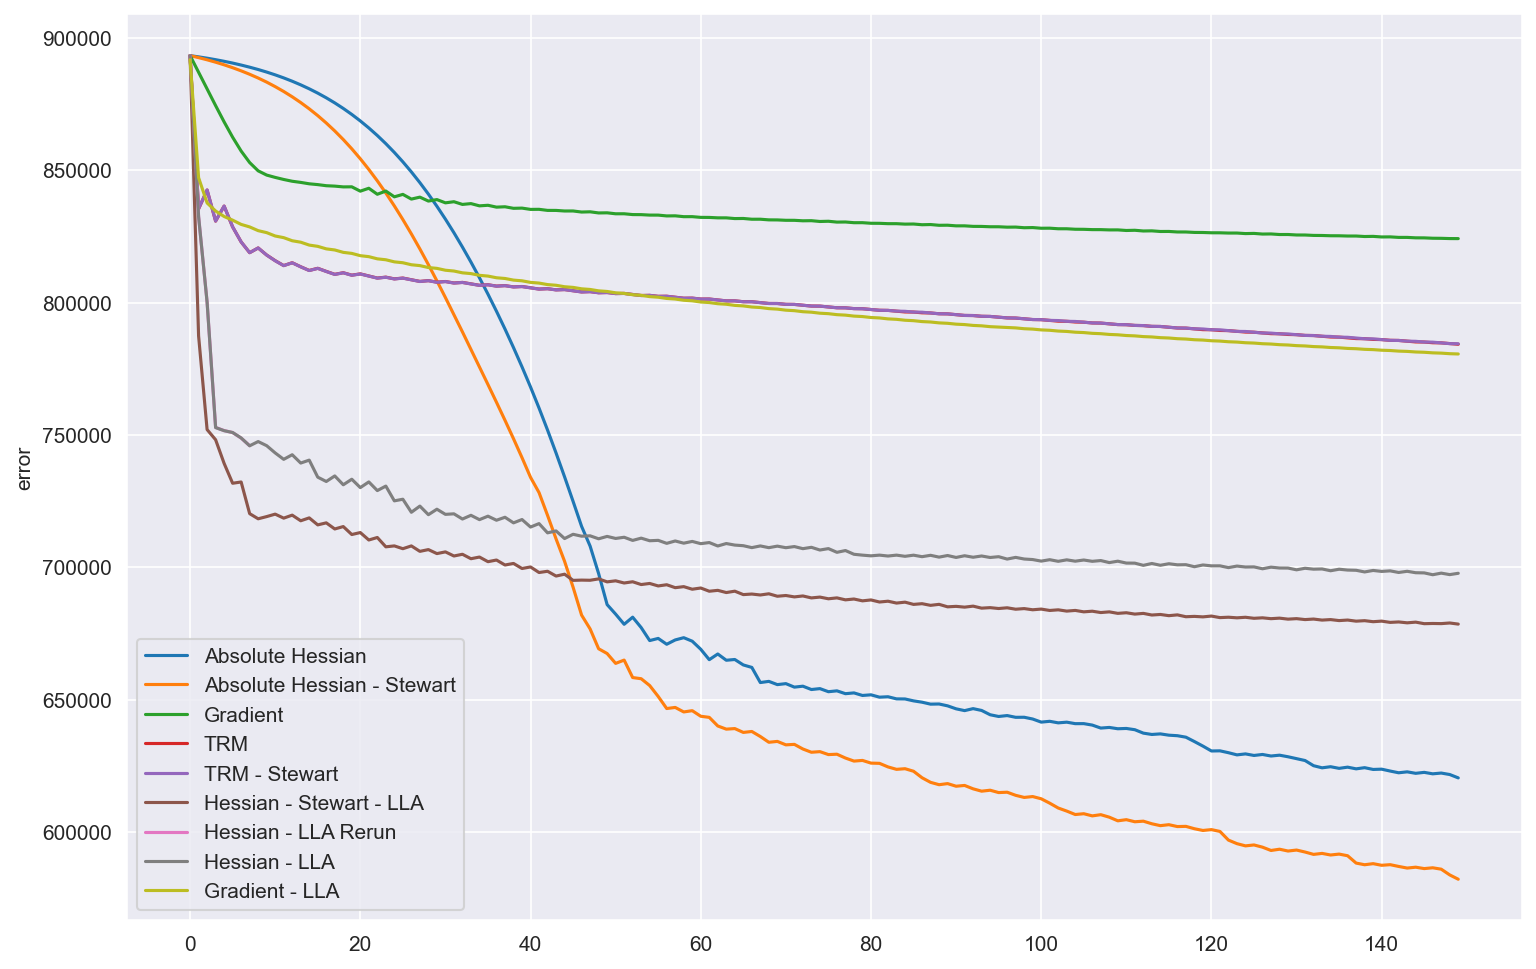

In [5]:
import os

def get_run_result(summ_dir):
    summ_fns = os.listdir(summ_dir)

    jsons = []
    errors = []
    evs = []
    params = []
    for fn in summ_fns:
        with open(summ_dir + fn) as file:
            data = json.load(file)
            jsons.append(data)
            evs.append(data['evs'])
            errors.append(data['error'])
            params.append(data['params'])


    errors = pd.Series(errors, name='error')
    evs = pd.DataFrame(evs)

    return RunResult(errors, evs, params)

abh = get_run_result('../../archives/abh/summaries/')
abhst = get_run_result('../../archives/abhst/summaries/')
gra = get_run_result('../../archives/gra/summaries/')
trm = get_run_result('../../archives/trm/summaries/')
trmst = get_run_result('../../archives/trmst/summaries/')
hesstlla = get_run_result('../../archives/hesstlla/summaries/')
heslla = get_run_result('../../summaries/')
heslla_errors = pd.read_csv('../../python/ssef/qaerrors.csv', header=None).iloc[:150]
gralla_errors = pd.read_csv('../../python/ssef/gradienterrors.csv', header=None).iloc[:150]

display(pd.concat([abh.errors, abhst.errors, gra.errors,
                   trm.errors, trmst.errors, hesstlla.errors, heslla.errors,
                   heslla_errors, gralla_errors], axis=1))

plt.figure(figsize=(12, 8), dpi=150)
ax = 0
for rr in [abh, abhst, gra, trm, trmst, hesstlla, heslla]:
    ax = sns.lineplot(x=rr.errors.index, y=rr.errors)

sns.lineplot(x=heslla_errors.index, y=heslla_errors[0])
sns.lineplot(x=gralla_errors.index, y=gralla_errors[0])

ax.legend(['Absolute Hessian', 'Absolute Hessian - Stewart', 'Gradient', 'TRM', 'TRM - Stewart', 'Hessian - Stewart - LLA', 'Hessian - LLA Rerun', 'Hessian - LLA', 'Gradient - LLA'])

In [36]:
params = np.array(hesstlla.params) # A
params[1]-params[0]

array([[ 6.07162339e-03,  1.63837654e-03,  0.00000000e+00,
        -4.59866251e-03,  0.00000000e+00,  9.19903571e-04,
         0.00000000e+00, -6.49934671e-06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.23363610e-04,  4.43629062e-03,  3.59556391e-03,
        -2.73829644e-03,  1.57980824e-03,  9.80332533e-05,
        -3.79338839e-04,  2.56907123e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.51093136e-03,  1.85531476e-01, -6.40300028e-02,
        -2.67236122e-02, -2.33884343e-03,  3.04830082e-02,
        -3.41278661e-03,  9.88238666e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 7.11825520e-03, -6.27894689e-01,  9.28004148e-03,
         2.56091116e-03, -4.14694821e-03, -3.53957916e-02,
         9.35847643e-03, -9.70967589e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e

In [42]:
A = params[1]-params[0]
A = A.reshape(65,1)
Anoz = np.array([x for x in A if x != 0])
Anoz

array([[ 6.07162339e-03],
       [ 1.63837654e-03],
       [-4.59866251e-03],
       [ 9.19903571e-04],
       [-6.49934671e-06],
       [-1.23363610e-04],
       [ 4.43629062e-03],
       [ 3.59556391e-03],
       [-2.73829644e-03],
       [ 1.57980824e-03],
       [ 9.80332533e-05],
       [-3.79338839e-04],
       [ 2.56907123e-03],
       [-2.51093136e-03],
       [ 1.85531476e-01],
       [-6.40300028e-02],
       [-2.67236122e-02],
       [-2.33884343e-03],
       [ 3.04830082e-02],
       [-3.41278661e-03],
       [ 9.88238666e-02],
       [ 7.11825520e-03],
       [-6.27894689e-01],
       [ 9.28004148e-03],
       [ 2.56091116e-03],
       [-4.14694821e-03],
       [-3.53957916e-02],
       [ 9.35847643e-03],
       [-9.70967589e-02],
       [-9.18822658e-02],
       [ 3.42136077e+00],
       [-1.53739282e+00],
       [ 8.77950310e-02],
       [ 5.97335566e-02],
       [-2.67044117e-02],
       [-6.51808570e-02],
       [ 4.17655074e-01]])

In [4]:
params2 = np.array(heslla.params) # B
B = params2[1]-params2[0]
display(B)
B = B.reshape(65,1)
Bnoz = np.array([x for x in B if x != 0])
Bnoz

array([[-3.51766381e-04, -1.54648683e-03,  0.00000000e+00,
         8.80986494e-04,  0.00000000e+00,  4.07374352e-05,
         0.00000000e+00,  1.48400977e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-8.80668801e-05, -1.44568791e-04, -4.66196705e-04,
         4.51052146e-04, -9.73881029e-04,  5.65036408e-05,
         2.11245027e-05,  5.87701356e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.58244073e-03, -3.05037114e-02,  1.89113273e-02,
         3.18355549e-03,  2.23483358e-03, -8.36126169e-03,
         9.27470606e-04, -2.66493276e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 4.85833377e-04,  6.40069890e-02, -1.67126110e-02,
         7.02447549e-03,  2.66857710e-03,  8.71946819e-03,
        -2.04418143e-03,  1.93073466e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e

array([[-3.51766381e-04],
       [-1.54648683e-03],
       [ 8.80986494e-04],
       [ 4.07374352e-05],
       [ 1.48400977e-04],
       [-8.80668801e-05],
       [-1.44568791e-04],
       [-4.66196705e-04],
       [ 4.51052146e-04],
       [-9.73881029e-04],
       [ 5.65036408e-05],
       [ 2.11245027e-05],
       [ 5.87701356e-04],
       [ 1.58244073e-03],
       [-3.05037114e-02],
       [ 1.89113273e-02],
       [ 3.18355549e-03],
       [ 2.23483358e-03],
       [-8.36126169e-03],
       [ 9.27470606e-04],
       [-2.66493276e-02],
       [ 4.85833377e-04],
       [ 6.40069890e-02],
       [-1.67126110e-02],
       [ 7.02447549e-03],
       [ 2.66857710e-03],
       [ 8.71946819e-03],
       [-2.04418143e-03],
       [ 1.93073466e-02],
       [-3.06289583e-04],
       [-3.39811094e-01],
       [ 3.39243289e-01],
       [-6.24663963e-02],
       [-1.84612802e-02],
       [-7.45205949e-04],
       [ 1.01170894e-02],
       [-9.01048307e-02]])

In [56]:
data = 0
fil1 = '../../outputs/0000-C3U3RNBEO0-780GOAZOE5.json' # B
fil2 = '../../archives/hesstlla/outputs/0000-C3U3RNBEO0-ESTMOEWBT1.json' # A
with open(fil2) as file:
    data = json.load(file)
H = np.array(data['ttHessian'])
H

array([[ 1.83971489e+09, -3.37490902e+08, -5.82422575e+08, ...,
        -3.87636128e+06, -1.11169082e+07,  1.47244627e+06],
       [-3.37490902e+08,  6.22299908e+07,  1.07387791e+08, ...,
         7.04669221e+05,  2.02632701e+06, -2.68301022e+05],
       [-5.82422575e+08,  1.07387791e+08,  1.85596670e+08, ...,
         1.16484418e+06,  3.36829854e+06, -4.45124863e+05],
       ...,
       [-3.87636128e+06,  7.04669221e+05,  1.16484418e+06, ...,
         1.45354374e+07,  3.87849690e+07, -5.09105841e+06],
       [-1.11169082e+07,  2.02632701e+06,  3.36829854e+06, ...,
         3.87849690e+07,  1.06732582e+08, -1.40030283e+07],
       [ 1.47244627e+06, -2.68301022e+05, -4.45124863e+05, ...,
        -5.09105841e+06, -1.40030283e+07,  1.85071951e+06]])

In [59]:
smth = np.matmul(H, Anoz)
smth / np.linalg.norm(smth)

array([[ 2.26301903e-01],
       [-4.10567447e-02],
       [-6.64129057e-02],
       [-1.72356847e-01],
       [ 6.22234850e-02],
       [ 6.75897464e-01],
       [-3.33152668e-02],
       [-5.78660139e-02],
       [-4.75881027e-02],
       [-1.07839952e-01],
       [-3.27620178e-01],
       [-5.55064713e-01],
       [ 3.49317856e-02],
       [ 3.97959126e-02],
       [-9.91836099e-04],
       [-2.48732892e-03],
       [-4.50347383e-03],
       [-9.12021234e-03],
       [-1.18888954e-02],
       [-4.92667753e-02],
       [ 2.37726754e-03],
       [ 4.60960367e-02],
       [-1.22012019e-03],
       [-3.45163047e-03],
       [-1.31673296e-02],
       [-3.13874014e-02],
       [-1.90763187e-02],
       [-8.62918695e-02],
       [ 6.97318552e-03],
       [ 1.55828502e-02],
       [-4.29407923e-04],
       [-1.08943151e-03],
       [-8.05472430e-03],
       [-2.21141057e-02],
       [-1.01440759e-02],
       [-3.04501587e-02],
       [ 4.26472919e-03]])

In [58]:
g = np.array(data['ttGradient'])
g / np.linalg.norm(g)

array([-2.06174217e-01,  3.79468427e-02,  6.46639158e-02,  1.71007210e-01,
       -6.55803417e-02, -6.13075523e-01,  3.12570448e-02,  5.79659924e-02,
        4.85417754e-02,  1.09579591e-01,  3.43849967e-01,  6.19580904e-01,
       -3.99357911e-02, -5.64602378e-02,  1.46642580e-03,  2.87144580e-03,
        4.22020660e-03,  9.91870618e-03,  2.02028051e-02,  6.51450924e-02,
       -2.92739307e-03, -4.91944038e-02,  8.66826002e-04,  3.28911498e-03,
        1.46456698e-02,  3.34982870e-02,  1.36975299e-02,  8.63398501e-02,
       -7.63839848e-03, -6.83361653e-03,  2.04951414e-04,  5.72113511e-04,
        5.44739874e-03,  1.49157200e-02,  5.04288996e-03,  1.67157236e-02,
       -2.81152521e-03])

In [34]:
np.matmul(np.linalg.inv(H), g)

array([-1.56373952e-02, -7.56385575e-02,  4.13445239e-02,  2.45060656e-03,
        6.98735468e-03, -4.39266717e-03, -6.71789854e-03, -2.11445576e-02,
        2.14892616e-02, -4.72468091e-02,  2.63104426e-03,  9.28944468e-04,
        2.87283093e-02,  7.77686572e-02, -1.39338142e+00,  8.99520798e-01,
        1.44313293e-01,  1.09823585e-01, -4.00686048e-01,  4.43699864e-02,
       -1.26225763e+00,  2.61878962e-02,  2.85554390e+00, -8.03865072e-01,
        3.44875311e-01,  1.28502409e-01,  4.13866196e-01, -9.70072062e-02,
        9.10978983e-01, -5.42267299e-02, -1.55384138e+01,  1.57872315e+01,
       -3.01481470e+00, -8.80652552e-01, -6.82229160e-02,  4.71878738e-01,
       -4.26258513e+00])

In [ ]:
endn = len(abhst.errors) - 1
ggs = []

for i in range(1, endn):
    g = abh.errors[i] - abh.errors[i - 1]
    stg = abhst.errors[i] - abhst.errors[i - 1]
    ggs.append(g - stg)

plt.figure(figsize=(12, 8), dpi=150)
sns.lineplot(x=[x for x in range(1, endn)], y=ggs)

In [ ]:
display(trm.evs)
display(trmst.evs)

In [ ]:
logevs = np.sign(evs) * evs.abs() ** (1 / 9)
# logevs = np.sign(evs) * np.log10(evs.abs())

plt.figure(figsize=(12, 8), dpi=150)
for i in range(len(logevs.columns)):
    sns.lineplot(x=logevs.index, y=logevs[i])

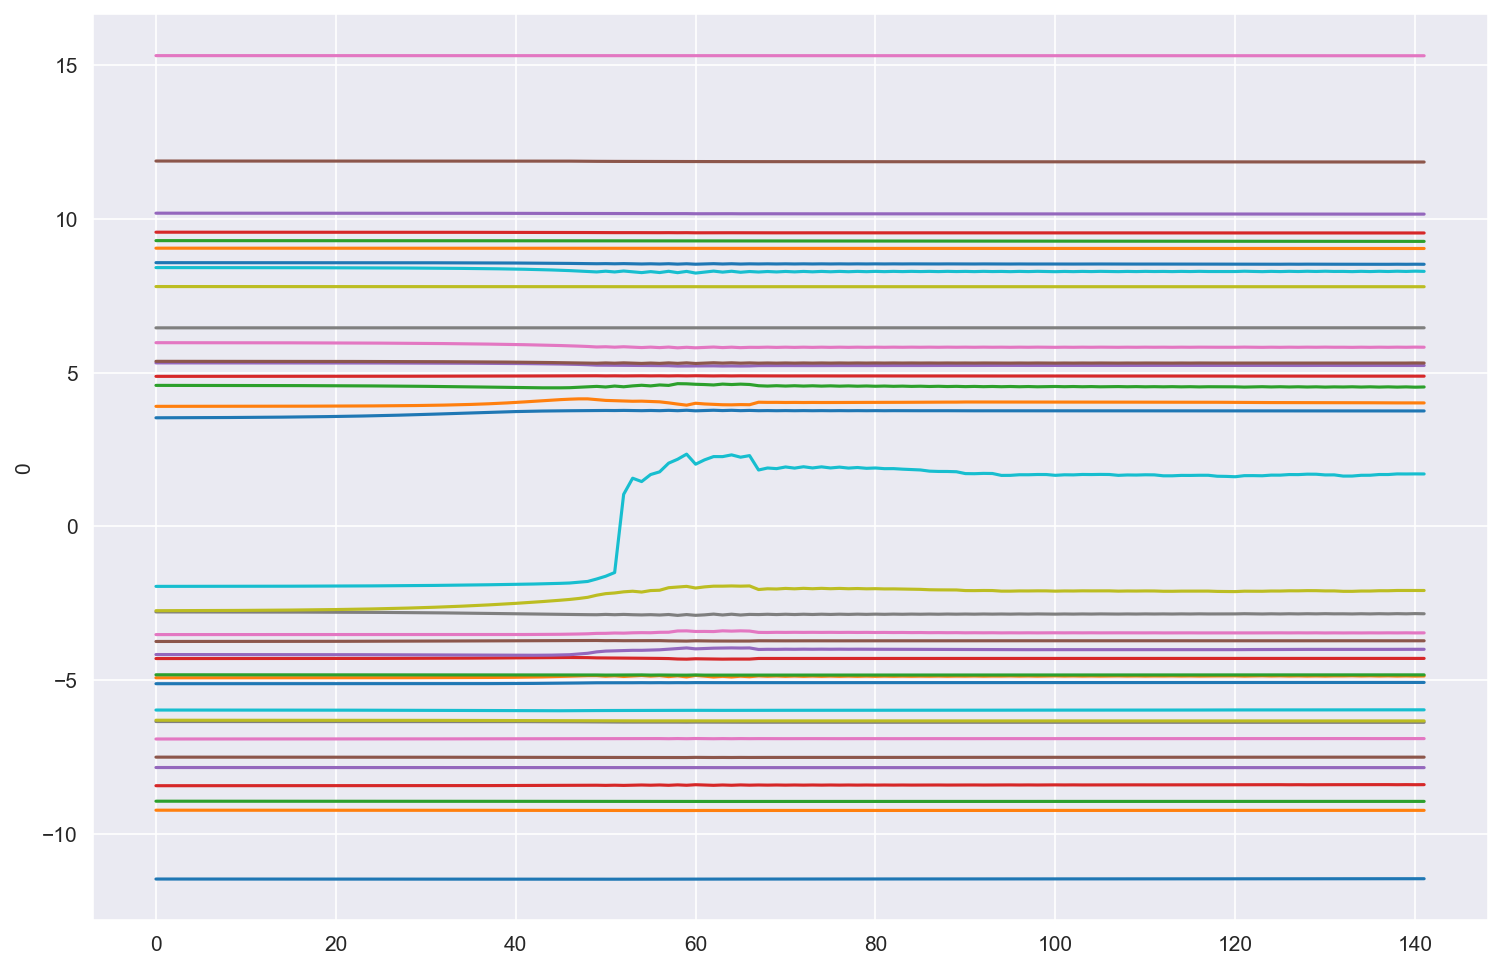

In [196]:
logevs = np.sign(evs) * evs.abs() ** (1 / 9)
# logevs = np.sign(evs) * np.log10(evs.abs())

plt.figure(figsize=(12, 8), dpi=150)
for i in range(len(logevs.columns)):
    sns.lineplot(x=logevs.index, y=logevs[i])

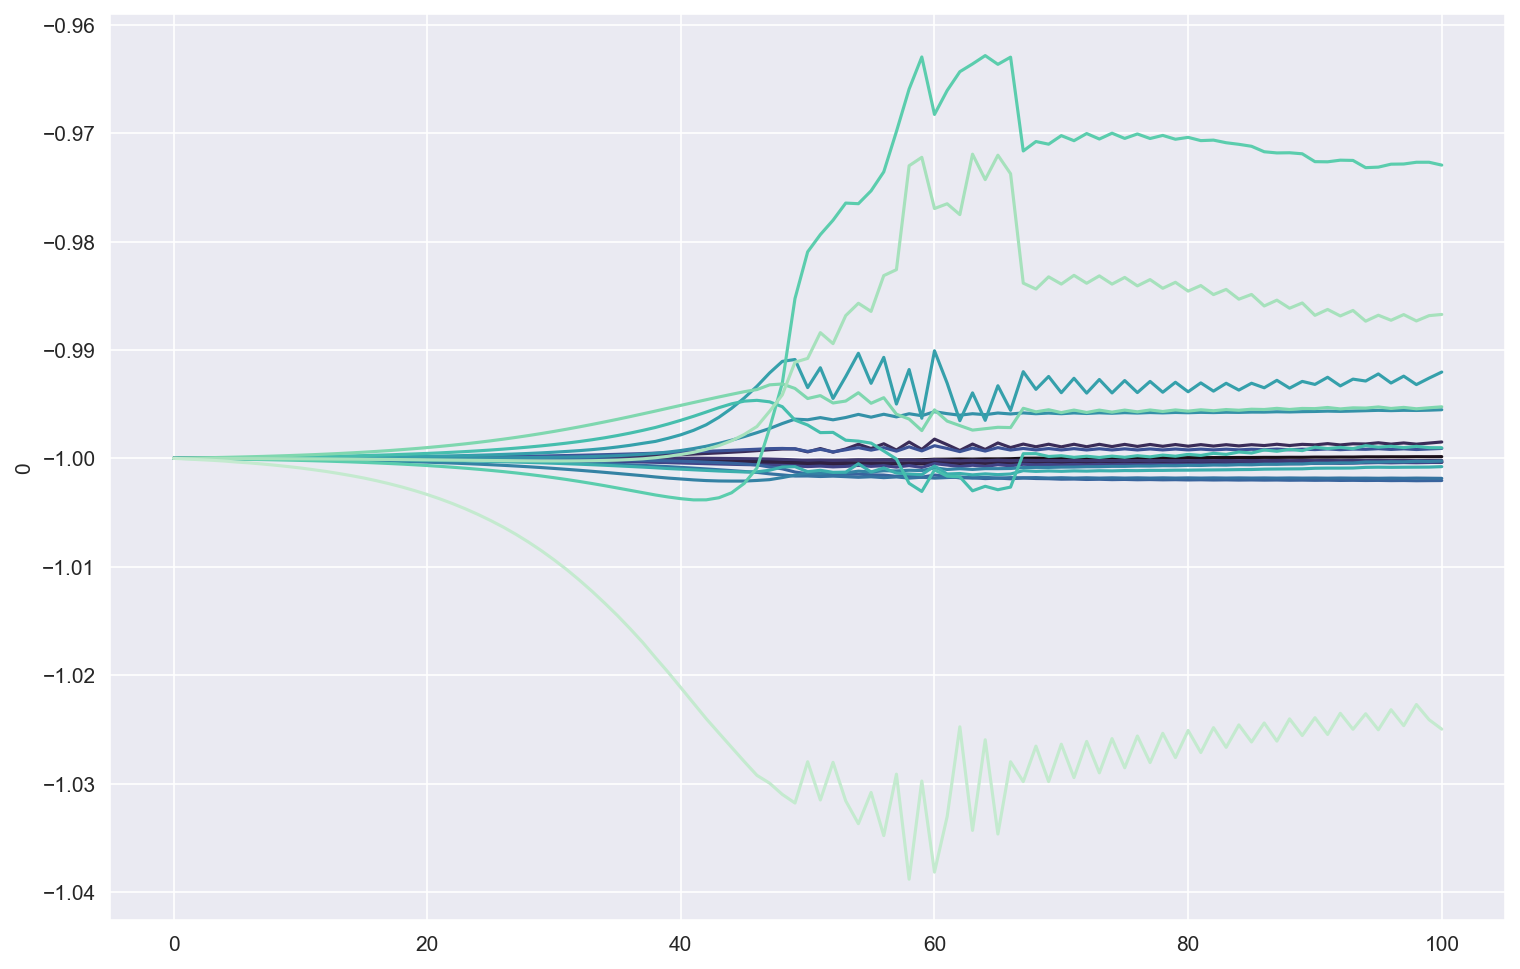

In [181]:
plt.figure(figsize=(12, 8), dpi=150)

n = len(logevs.columns)
n = 18
pal = sns.color_palette('mako', n)
for i in range(n):
    sns.lineplot(x=logevs.index, y=logevs[i] / abs(logevs.iloc[0, i]), color=pal[i])